In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [40]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/Walmart.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

# New Section

# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#converting  Holiday flag to bool
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

In [ ]:
#converting Store to category
df['Store'] = df['Store'].astype('category')

In [ ]:
#converting Date columns to date
df['Date'] = pd.to_datetime(df['Date'], format= 'mixed')

In [ ]:
# adding year column to
df['Year'] = df['Date'].dt.year

# adding week column to
df['Week'] = df['Date'].dt.isocalendar().week

# adding month column to
df['Month'] = df['Date'].dt.month

In [ ]:
df.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-05-02     1    1643690.90            0        42.31       2.572   
2010-12-02     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-05-03     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [ ]:
df.describe()

Date  Weekly_Sales  Temperature   Fuel_Price  \
count                           6435  6.435000e+03  6435.000000  6435.000000   
mean   2011-06-17 20:18:27.692307712  1.046965e+06    60.663782     3.358607   
min              2010-01-10 00:00:00  2.099862e+05    -2.060000     2.472000   
25%              2010-10-12 00:00:00  5.533501e+05    47.460000     2.933000   
50%              2011-06-17 00:00:00  9.607460e+05    62.670000     3.445000   
75%              2012-03-02 00:00:00  1.420159e+06    74.940000     3.735000   
max              2012-12-10 00:00:00  3.818686e+06   100.140000     4.468000   
std                              NaN  5.643666e+05    18.444933     0.459020   

               CPI  Unemployment         Year       Week        Month  
count  6435.000000   6435.000000  6435.000000     6435.0  6435.000000  
mean    171.578394      7.999151  2010.965035       26.0     6.475524  
min     126.064000      3.879000  2010.000000        1.0     1.000000  
25%     131.735000      6.891000  2010.000000       14.0     4.000000  
50%     182.616521      7.874000  2011.000000       26.0     6.000000  
75%     212.743293      8.622000  2012.000000       38.0     9.000000  
max     227.232807     14.313000  2012.000000       52.0    12.000000  
std      39.356712      1.875885     0.797019  14.511794     3.321797

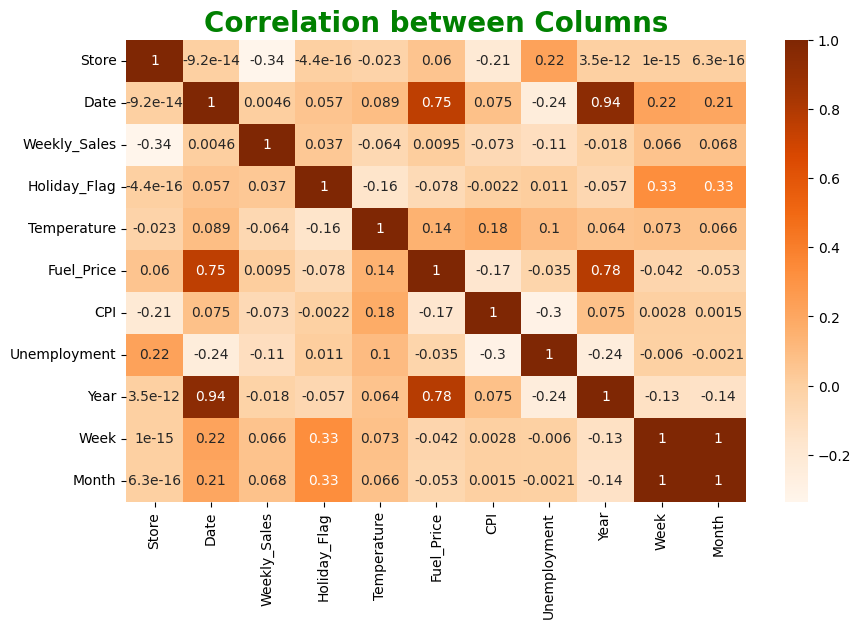

In [ ]:
#looking at correaltion between columns

plt.figure(figsize=(10,6))
heatmap_data = df.corr()
mask = np.triu(np.ones_like(heatmap_data, dtype=bool))
sns.heatmap(heatmap_data,annot=True,cmap='Oranges')
plt.title("Correlation between Columns",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.show()


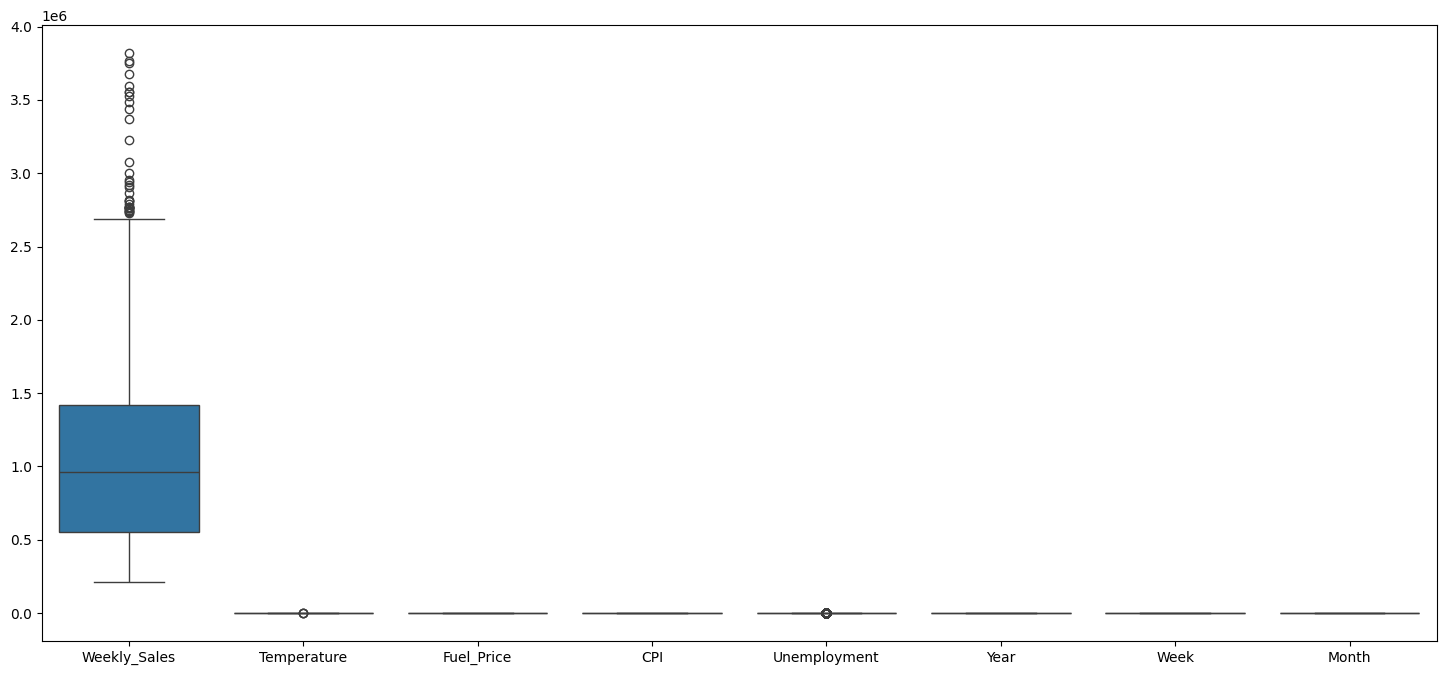

In [ ]:
# Using box plots
plt.figure(figsize=(18,8))
colours = sns.color_palette(n_colors=8)
sns.boxplot(data = df,palette=colours)
plt.show()

In [ ]:
Q3 = df['Weekly_Sales'].quantile(0.75)
Q1 = df['Weekly_Sales'].quantile(0.25)
IQR = Q3-Q1
upperLimit = Q3+(1.5*IQR)
lowerLimit = Q1-(1.5*IQR)

In [ ]:
filter = ((df['Weekly_Sales']<= upperLimit) & (df['Weekly_Sales']>= lowerLimit))
df = df[filter]

In [ ]:
df.head()

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0     1 2010-05-02    1643690.90            0        42.31       2.572   
1     1 2010-12-02    1641957.44            1        38.51       2.548   
2     1 2010-02-19    1611968.17            0        39.93       2.514   
3     1 2010-02-26    1409727.59            0        46.63       2.561   
4     1 2010-05-03    1554806.68            0        46.50       2.625   

          CPI  Unemployment  Year  Week  Month  
0  211.096358         8.106  2010    17      5  
1  211.242170         8.106  2010    48     12  
2  211.289143         8.106  2010     7      2  
3  211.319643         8.106  2010     8      2  
4  211.350143         8.106  2010    18      5

In [ ]:
#checking correaltion between Weekly Sales and Unemployment Rate
correlationCoeff = df['Weekly_Sales'].corr(df['Unemployment'])
print("The correlation coefficient of Weekly Sales and Unemployment Rate is : ",correlationCoeff)

The correlation coefficient of Weekly Sales and Unemployment Rate is :  -0.10429750912578388


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

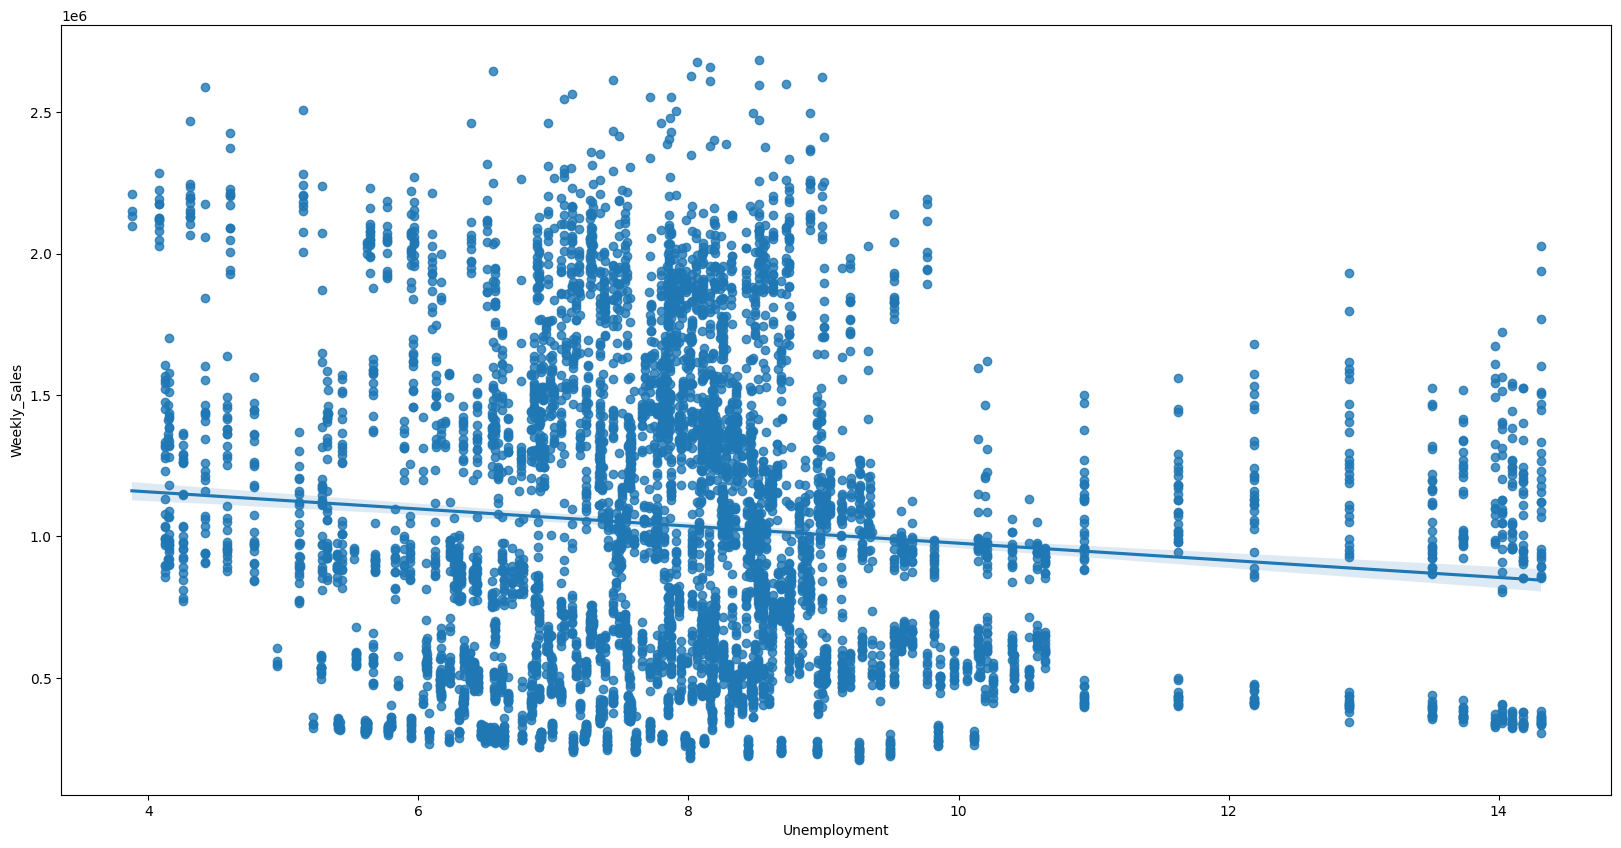

In [ ]:
#plotting the regression plot

plt.figure(figsize=(20,10))
sns.regplot(data = df,x = 'Unemployment',y = 'Weekly_Sales')

In [ ]:
# getting the correaltion between weekly sales and unemployment and sorting it
sortewise_correlation = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().sort_values(by = ('Weekly_Sales','Unemployment'))
sortewise_correlation.reset_index(inplace = True)

In [ ]:
#creating filter
min_corr = sortewise_correlation[('Weekly_Sales','Unemployment')].min()
filt = (sortewise_correlation[('Weekly_Sales','Unemployment')]==min_corr)
store = sortewise_correlation.loc[filt, 'Store']
print("Stores with the Highest Negative Correlation with Unemployment Rate:",store[0])

Stores with the Highest Negative Correlation with Unemployment Rate: 38


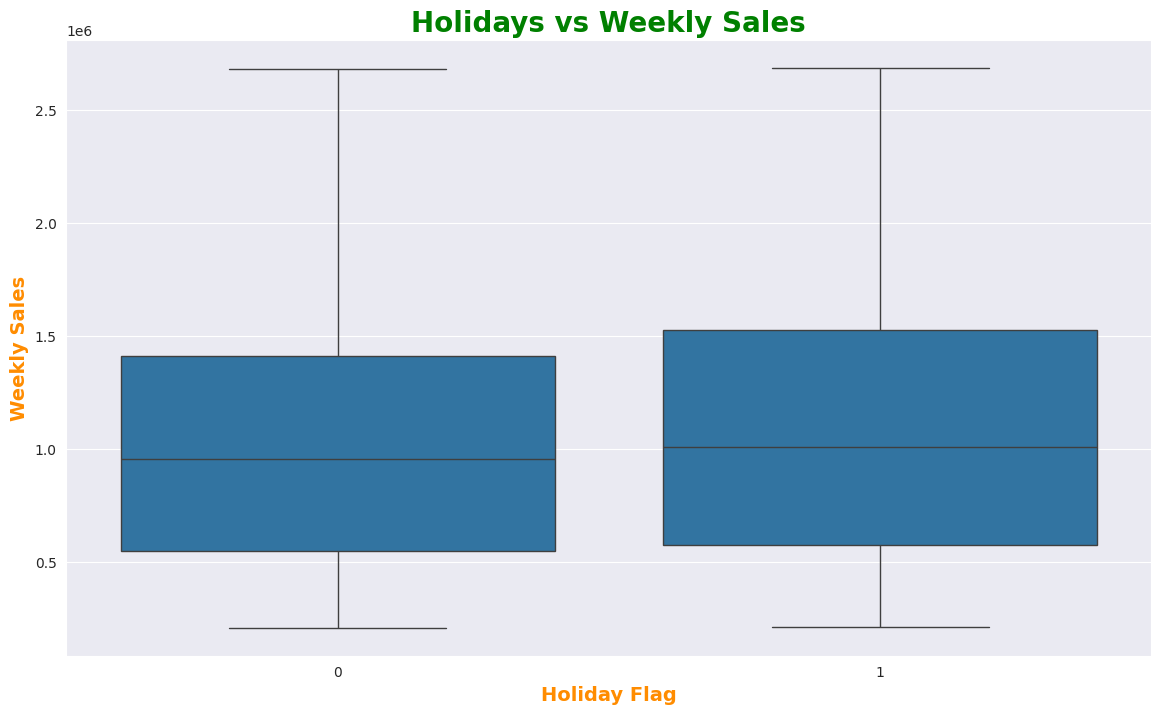

In [ ]:
# checking for holiday flag and how it affects weekly sales
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.boxplot(data = df,x = 'Holiday_Flag',y = 'Weekly_Sales')
plt.title("Holidays vs Weekly Sales",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Holiday Flag', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.show()

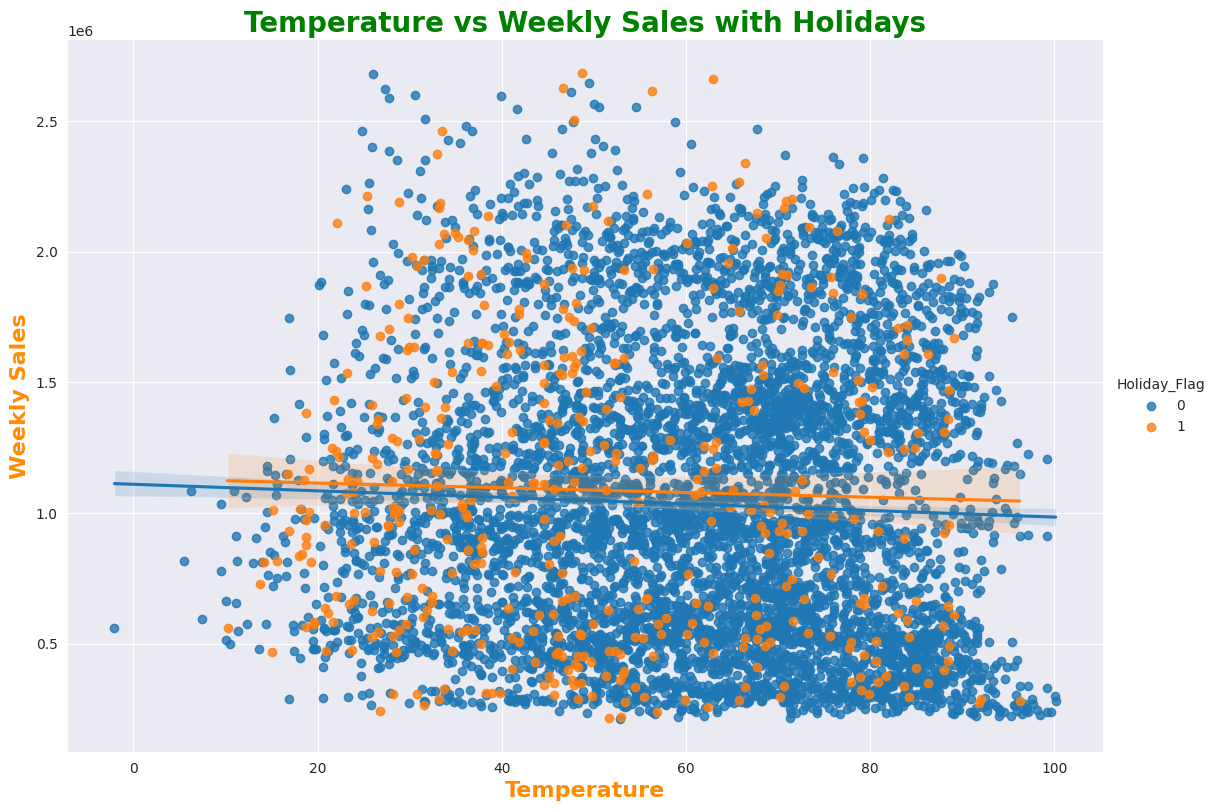

In [ ]:
# checking fortemperature and how it affects weekly sales with holiday flag
sns.set_style('darkgrid')
sns.lmplot(data = df,x = 'Temperature',y = 'Weekly_Sales',hue='Holiday_Flag',height=8, aspect=1.4)
plt.title("Temperature vs Weekly Sales with Holidays",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Temperature', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.show()

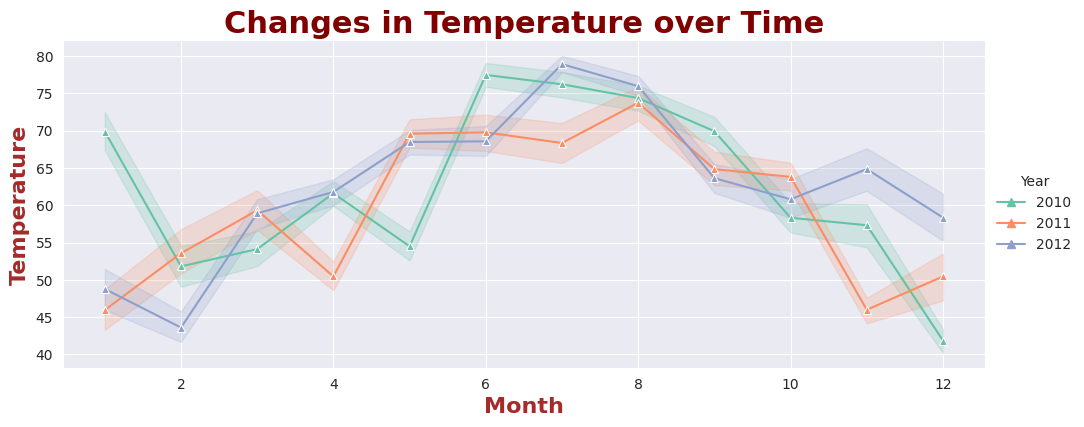

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data = df,x = 'Month',y = 'Temperature',hue='Year',
            kind = 'line',height = 4,aspect=2.5,palette='Set2',
            marker ='^')
plt.title('Changes in Temperature over Time', fontdict={'fontsize':22,'color':'Maroon','fontweight':'bold'})

plt.xlabel('Month', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('Temperature', color='brown',fontweight='bold', fontsize=16)
plt.show()

In [ ]:
# Create a list of unique store numbers
stores = df['Store'].unique()

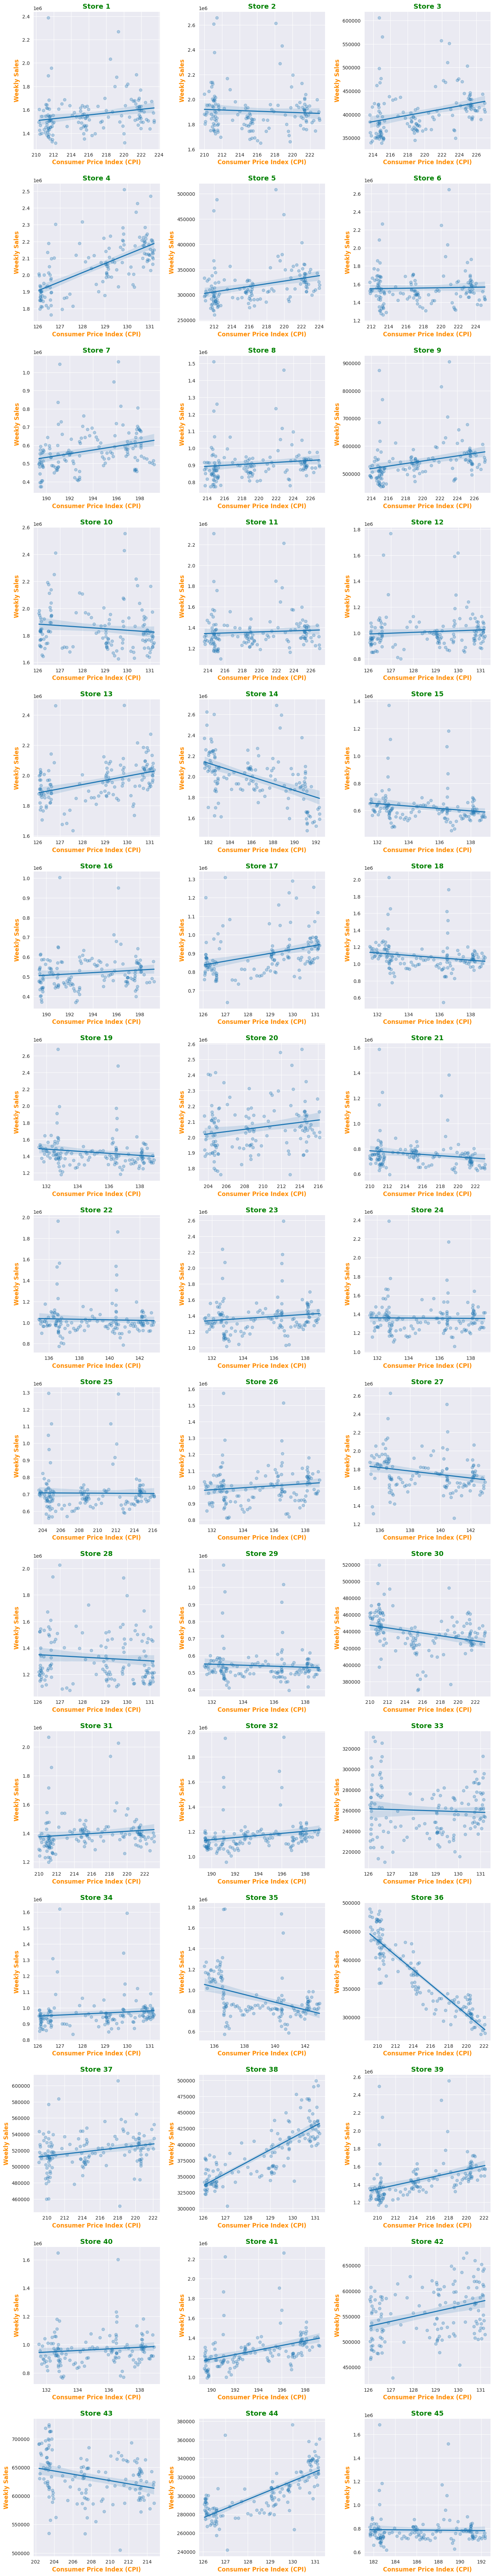

In [ ]:
fig, axes = plt.subplots(nrows=len(stores)//3, ncols=3, figsize=(15, 5*len(stores)//3))
fig.tight_layout(pad=5.0)

# Iterate over each store and create a scatter plot
for i, store_num in enumerate(stores):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Filter the data for the specific store
    store_data = df[df['Store'] == store_num]

    # Plot scatter plot with regression line
    sns.set_style('darkgrid')
    sns.regplot(x='CPI', y='Weekly_Sales', data=store_data, ax=ax, scatter_kws={'alpha':0.3})

    ax.set_title(f'Store {store_num}',fontdict={'fontsize':14,'color':'Green','fontweight':'bold'})
    ax.set_xlabel('Consumer Price Index (CPI)', color='#FF8C00',  fontweight='bold', fontsize=12)
    ax.set_ylabel('Weekly Sales', color='#FF8C00', fontweight='bold', fontsize=12)

plt.show()

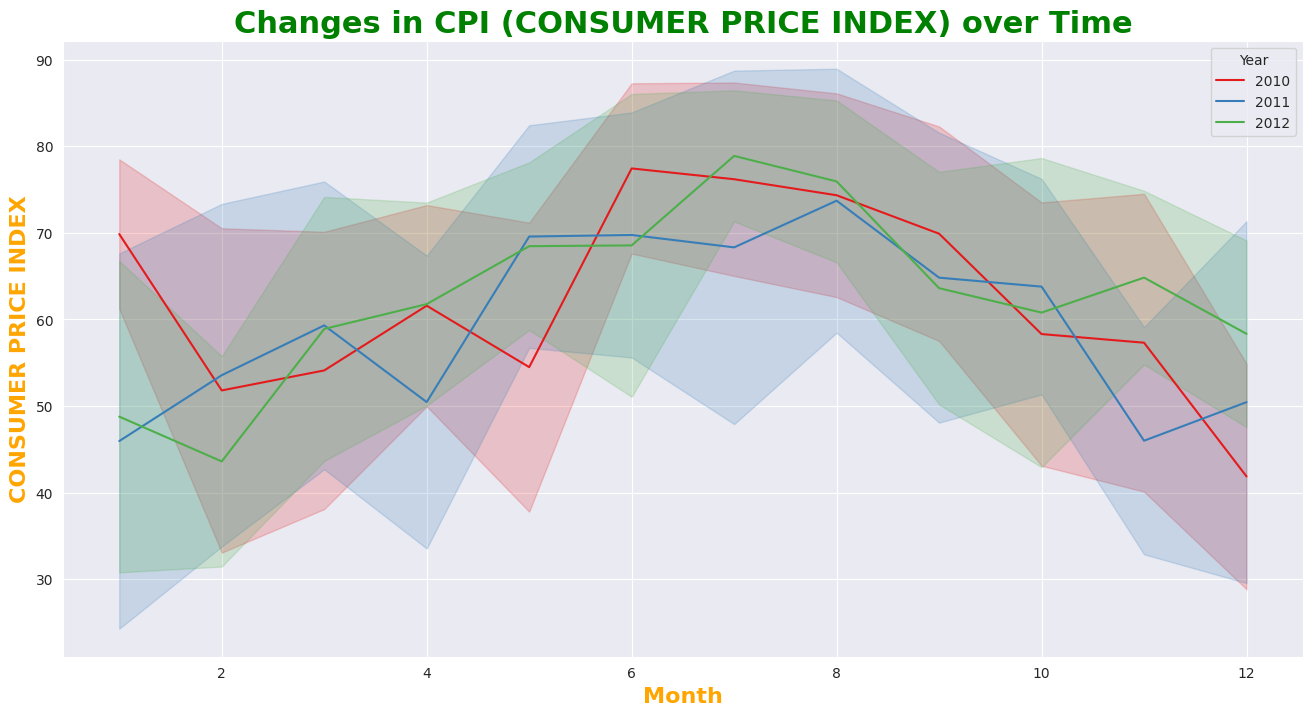

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.lineplot(
    data=df,
    x='Month',
    y='Temperature',
    hue='Year',
    ci='sd',  # Specify the standard deviation for shading
    err_style='band',  # Use a shaded band for the confidence interval
    palette='Set1'
)

# Set the title
plt.title('Changes in CPI (CONSUMER PRICE INDEX) over Time', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Month', color='orange',fontweight='bold', fontsize=16)
plt.ylabel('CONSUMER PRICE INDEX', color='orange',fontweight='bold', fontsize=16)
plt.show()

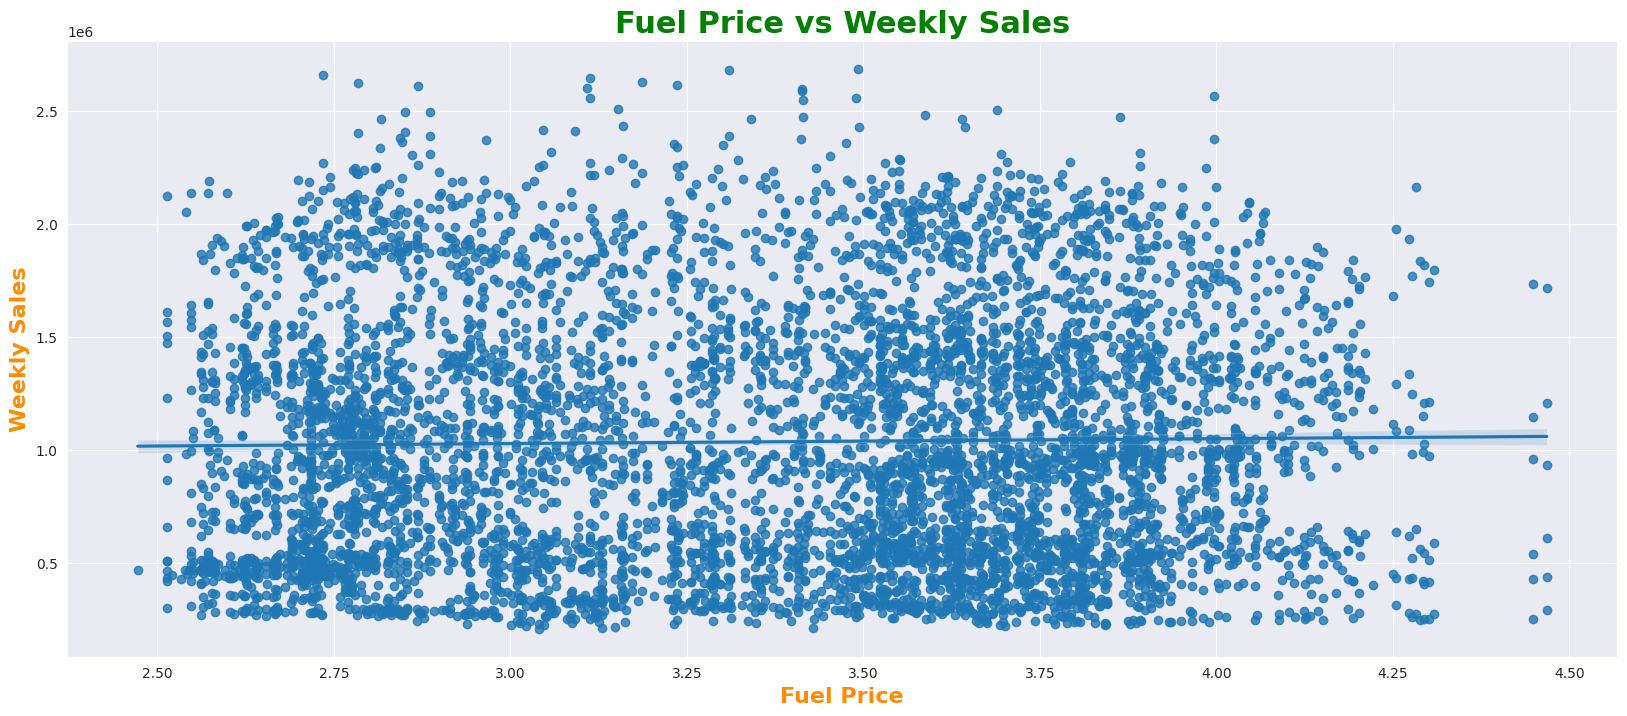

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
sns.regplot(data = df,x = 'Fuel_Price',y = 'Weekly_Sales')
plt.title('Fuel Price vs Weekly Sales', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.xlabel('Fuel Price', color='#FF8C00',  fontweight='bold', fontsize=16)

plt.show()

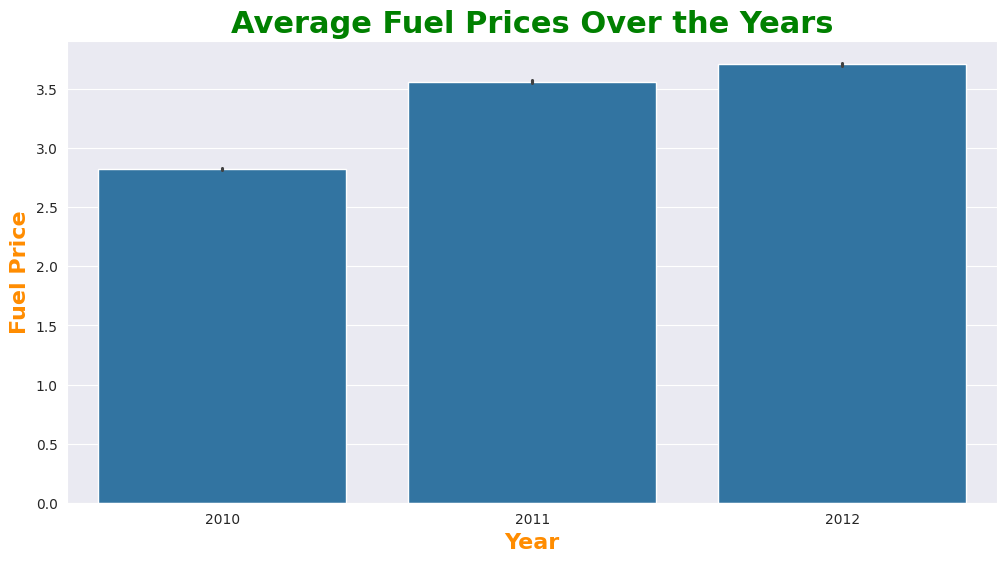

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data = df,x = 'Year',y = 'Fuel_Price')
plt.title('Average Fuel Prices Over the Years', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})
plt.xlabel('Year', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Fuel Price', color='#FF8C00',fontweight='bold', fontsize=16)

plt.show()

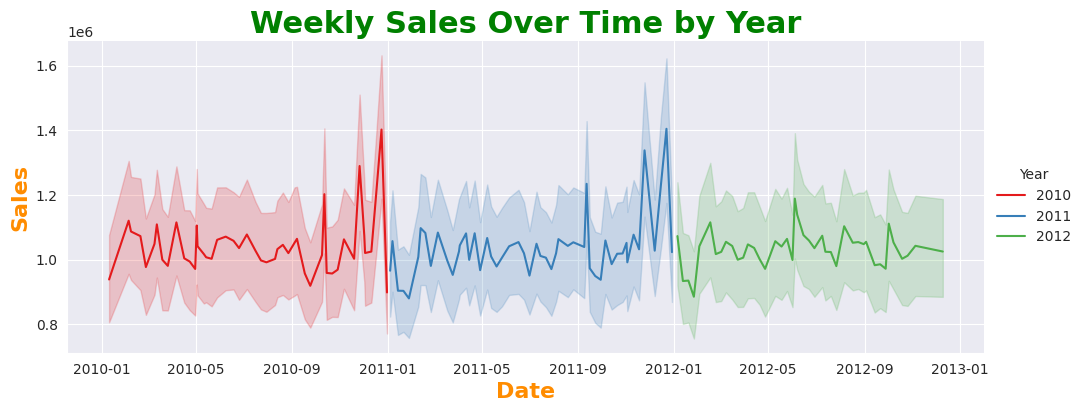

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data = df,x = 'Date',y = 'Weekly_Sales',hue='Year',kind = 'line',height = 4,aspect=2.5,palette='Set1')
plt.title('Weekly Sales Over Time by Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})
plt.xlabel('Date', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Sales', color='#FF8C00',fontweight='bold', fontsize=16)
plt.show()


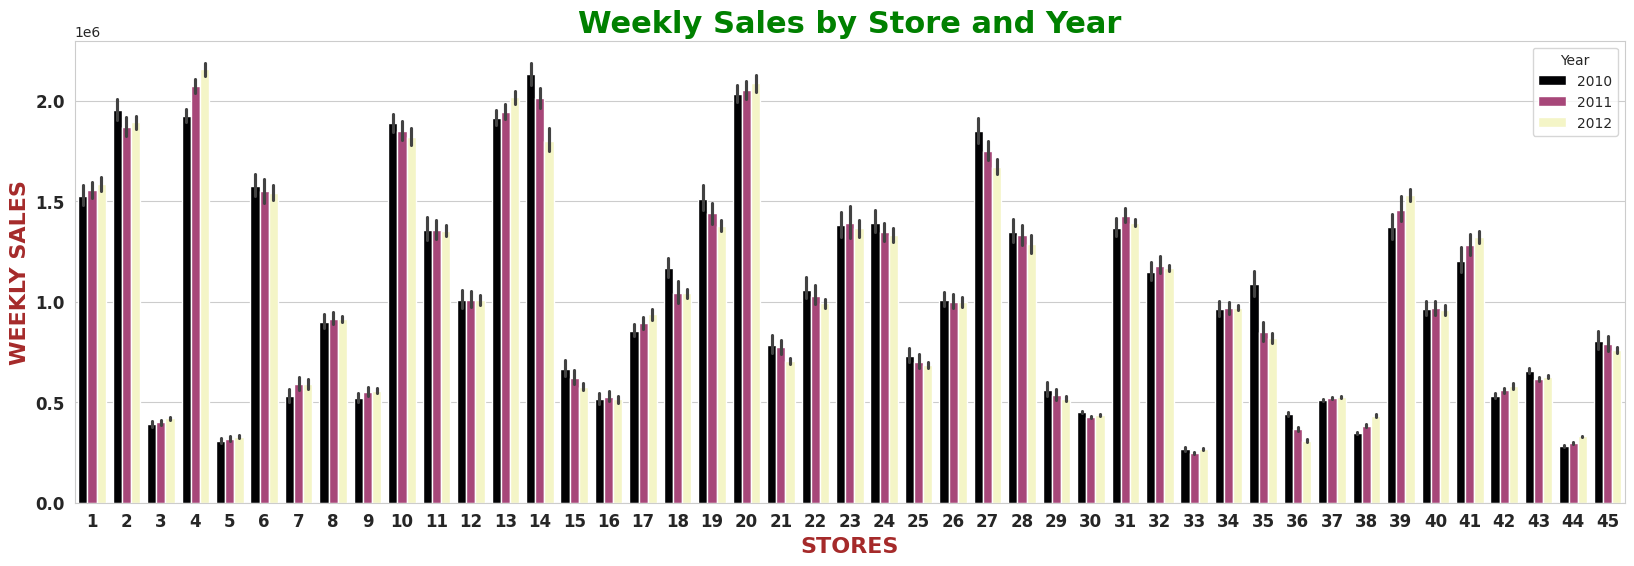

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(data = df,x = 'Store',y = 'Weekly_Sales',hue ='Year',palette='magma' )
plt.title('Weekly Sales by Store and Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})
plt.xlabel('STORES', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('WEEKLY SALES', color='brown',fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.show()

In [ ]:
#grouping the data Year wsie and then Store wise
performers = df.groupby(['Year','Store']).agg(Yearly_Sales=('Weekly_Sales','sum')).reset_index()

best_store = pd.DataFrame()
# getting unique values in Year column
year = df.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year'] == i)
    max_sale = performers[filt]['Yearly_Sales'].max()
    mask = (performers['Yearly_Sales']==max_sale)
    best_store = pd.concat([best_store,performers[filt][mask]])

best_store.reset_index(drop = True,inplace=True)

#Changing the datatype to int for Store column
best_store['Store'] = best_store['Store'].astype('int')
unique_years = sorted(best_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    best_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(best_store['Year'].unique())},  # Enforce order without decimals

)
fig.update_layout(
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Top Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()


In [ ]:
worst_store = pd.DataFrame()
# getting unique values in Year column
year = df.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year']==i)
    min_sale = performers[filt]['Yearly_Sales'].min()
    mask = (performers[filt]['Yearly_Sales']==min_sale)
    worst_store = pd.concat([worst_store,performers[filt][mask]])

worst_store.reset_index(drop = True,inplace=True)

#Changing the datatype to int for Store column
worst_store['Store'] = worst_store['Store'].astype('int')
unique_years = sorted(worst_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    worst_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(worst_store['Year'].unique())},  # Enforce order without decimals

)

fig.update_layout(
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Worst Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()

To assess the significance of the difference between the highest and lowest performing stores
we will calculate various statistical measures.

In [ ]:
for i in year:
    filt = (performers['Year']==i)
    sales_range = performers[filt]['Yearly_Sales'].max() - performers[filt]['Yearly_Sales'].min()#range
    print('Stats for Yearly Sales in the year ',i)
    print('Range : ',sales_range)

    sales_mean = performers[filt]['Yearly_Sales'].mean() # Avg sales
    print('Average Sales : ',sales_mean)

    sales_std = performers[filt]['Yearly_Sales'].std()#std deviation
    print('Standtard Deviation : ',sales_std)

    cv = (sales_std / sales_mean) * 100#coefficient of Variance
    print('Relative Variance : ',cv)

    #percentile analysis
    sales_25th_percentile = performers[filt]['Yearly_Sales'].quantile(0.25)
    sales_75th_percentile = performers[filt]['Yearly_Sales'].quantile(0.75)
    print('25th_percentile : ',sales_25th_percentile)
    print('75th_percentile : ',sales_75th_percentile)
    print(' ')



Stats for Yearly Sales in the year  2010
Range :  83192150.55
Average Sales :  49501474.735999994
Standtard Deviation :  24543508.623179175
Relative Variance :  49.581368543208036
25th_percentile :  25568078.15
75th_percentile :  65782276.32
 
Stats for Yearly Sales in the year  2011
Range :  89769365.03999999
Average Sales :  53434914.90044444
Standtard Deviation :  26897017.527062986
Relative Variance :  50.33603511332488
25th_percentile :  29117302.669999998
75th_percentile :  74169225.52
 
Stats for Yearly Sales in the year  2012
Range :  81335638.21
Average Sales :  44447396.87444445
Standtard Deviation :  23019092.759410933
Relative Variance :  51.78951834780234
25th_percentile :  24827530.71
75th_percentile :  59212433.28
 


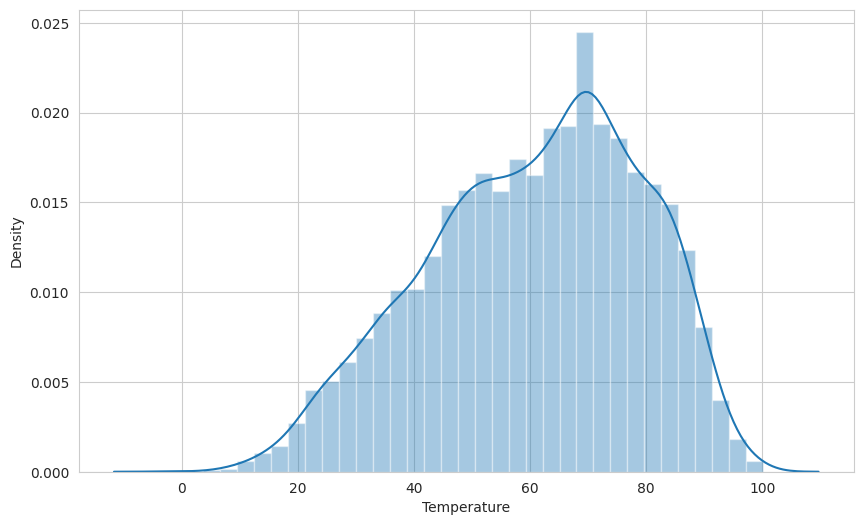

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Temperature'])
plt.show()

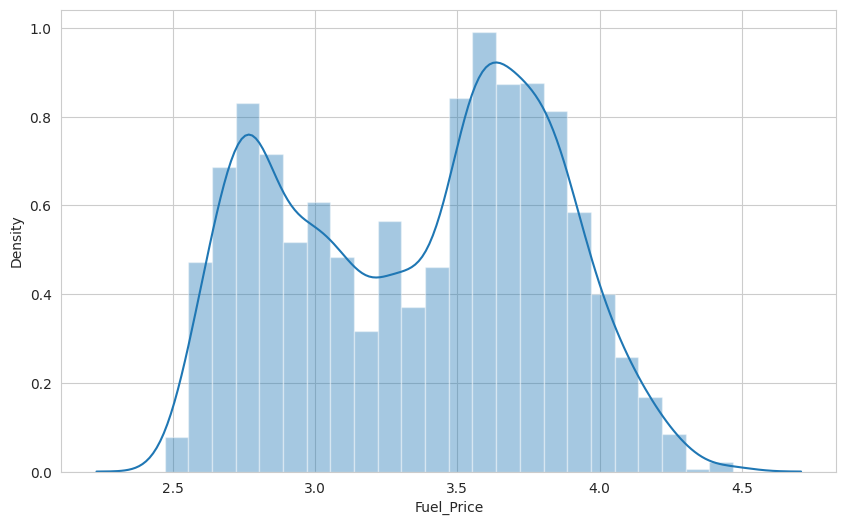

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Fuel_Price'])
plt.show()

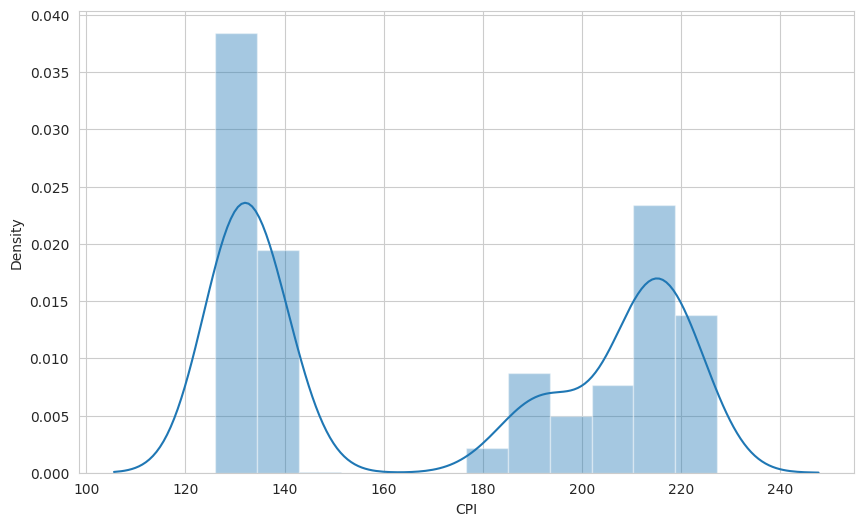

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['CPI'])
plt.show()

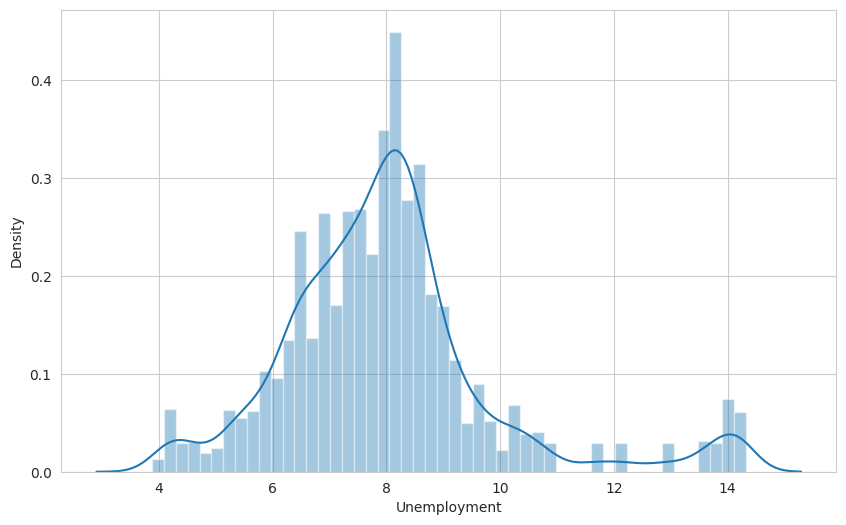

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Unemployment'])
plt.show()

In [ ]:
lst = list(df.columns)
lst.remove('Weekly_Sales')
lst.remove('Store')
lst.remove('Holiday_Flag')
lst.remove('Date')
X = df[lst]
y = df['Weekly_Sales']

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
print(vif_data)

        feature         VIF
0   Temperature   13.291808
1    Fuel_Price   60.255810
2           CPI   24.527554
3  Unemployment   22.061234
4          Year  145.332635
5          Week  606.455295
6         Month  691.535853


In [ ]:
#we can drop year,month,week columns as those columns were not there in the original data
df.drop(columns=['Year','Week','Month'],inplace = True)

In [ ]:
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.53
Date:                Mon, 27 May 2024   Prob (F-statistic):           3.06e-30
Time:                        12:23:07   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6396   BIC:                         1.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.651e+06   7.72e+04     21.378   

In [ ]:
#setting Date column to index
df1 =df.set_index('Date',inplace = True)

KeyError: "None of ['Date'] are in the columns"

In [ ]:
df1.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-05-02     1    1643690.90            0        42.31       2.572   
2010-12-02     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-05-03     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [ ]:
lst = list(df.columns)
lst.remove('Weekly_Sales')
X = df[lst]
y = df['Weekly_Sales']

In [ ]:
function_list = ['Unemployment']
power_list = ['Temperature','Fuel_Price']
skip_list = ['Store','Holiday_Flag','CPI']

In [ ]:
transformers = [('function',FunctionTransformer(np.log1p),function_list),
               ('power',PowerTransformer(),power_list),
               ('skip','passthrough',skip_list)]

In [ ]:
column_Transformer = ColumnTransformer(transformers=transformers,remainder = 'passthrough')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

results_df = pd.DataFrame(columns=['Model', 'y_test', 'y_pred', 'R2 Score'])
# Define models and their respective hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'model__max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestRegressor(), {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 5, 10]}),
    'XGBoost': (XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]})
}

# Perform hyperparameter tuning and evaluation for each model
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessing', column_Transformer),  # Include any necessary preprocessing steps
        ('model', model),
    ])

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='r2',  # Use mean squared error as the scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding mean squared error
    best_params = grid_search.best_params_
    best_mse = -grid_search.best_score_
    print(f"{model_name} - Best Hyperparameters: {best_params}, Best Mean Squared Error: {best_mse}")

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test)

    # Evaluate the model on the test set
    r2 = r2_score(y_test, y_pred)

    # Append results to the DataFrame
    new_data = pd.DataFrame({
          'Model': model_name,
          'y_test': y_test.values,
          'y_pred': y_pred,
          'R2 Score': r2
      })

    #results_df.append(new_data, inplace=True)
    results_df = pd.concat([results_df, new_data], ignore_index=True)


Decision Tree - Best Hyperparameters: {'model__max_depth': 10}, Best Mean Squared Error: -0.9188836431446642
Random Forest - Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}, Best Mean Squared Error: -0.9463622806156412
XGBoost - Best Hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 200}, Best Mean Squared Error: -0.95688975410082


In [ ]:
# Display the results DataFrame
results_df

Model      y_test        y_pred  R2 Score
0     Decision Tree  1054454.40  1.085798e+06  0.923134
1     Decision Tree  1591920.42  1.095430e+06  0.923134
2     Decision Tree  1415473.91  1.419258e+06  0.923134
3     Decision Tree   498580.87  5.445662e+05  0.923134
4     Decision Tree  1768172.31  1.855025e+06  0.923134
...             ...         ...           ...       ...
3838        XGBoost  2137202.38  2.070313e+06  0.964359
3839        XGBoost  1904421.74  2.001716e+06  0.964359
3840        XGBoost  1055841.24  8.725861e+05  0.964359
3841        XGBoost   855546.50  7.656598e+05  0.964359
3842        XGBoost   299354.67  3.016409e+05  0.964359

[3843 rows x 4 columns]

In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     3843 non-null   object 
 1   y_test    3843 non-null   float64
 2   y_pred    3843 non-null   float64
 3   R2 Score  3843 non-null   float64
dtypes: float64(3), object(1)
memory usage: 120.2+ KB


In [ ]:
#results_df['y_test'] = results_df.apply(lambda x: x.astype('uint8'))
#results_df['y_pred'] = results_df.apply(lambda x: x.astype('uint8'))

#results_df['y_test']=results_df['y_test'].str.strip('[]').str.split(',').map(np.array)

#results_df['y_pred']=results_df['y_pred'].str.strip('[]').str.split(',').map(np.array)

In [ ]:
for i, row in results_df.iterrows():
    plt.figure(figsize=(8, 6))
    sns.regplot(x=results_df['y_test'], y=results_df['y_pred'], line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
    #sns.regplot(x='y_test', y='y_pred', line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
    plt.title(f"{row['Model']} - Actual vs Predicted",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
    plt.xlabel('Actual (y_test)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.ylabel('Predicted (y_pred)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=12)
    plt.show()

In [62]:
data = df[['Date','Weekly_Sales']]

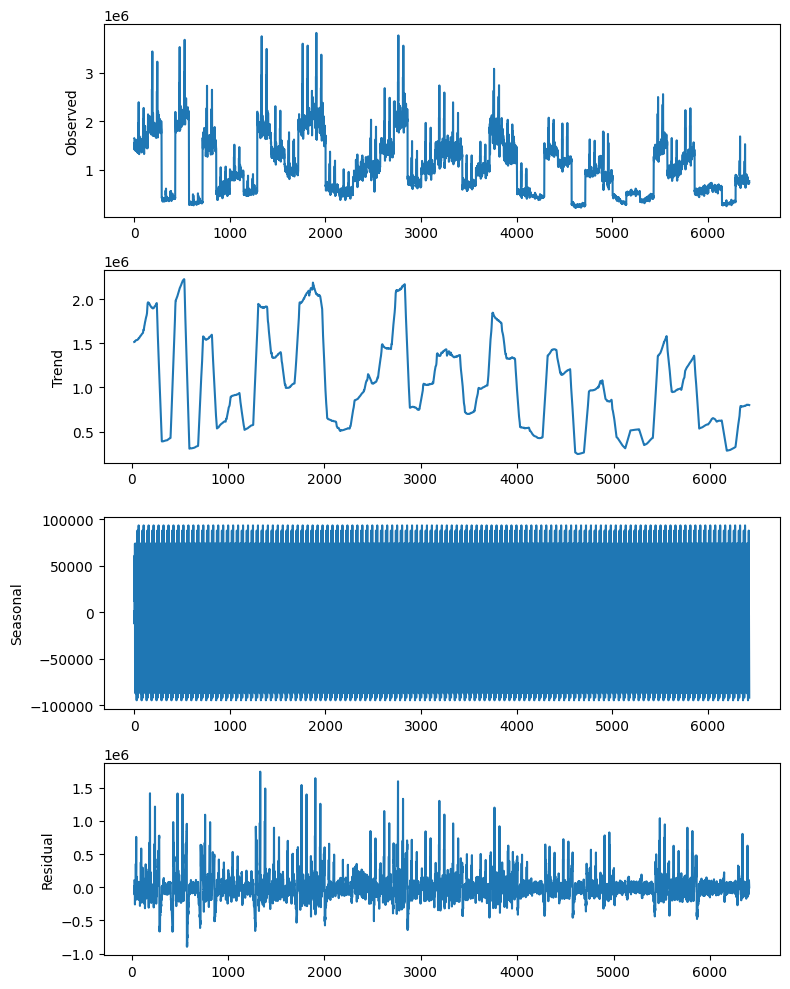

In [63]:
#Apply time series analysis to identify seasonal trends:

# Use seasonal decomposition to identify seasonal, trend, and residual components
result = sm.tsa.seasonal_decompose(data['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(8, 10))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('Seasonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [75]:
data = data.set_index(['Date'])
data.head()

Weekly_Sales
Date                    
05-02-2010    1643690.90
12-02-2010    1641957.44
19-02-2010    1611968.17
26-02-2010    1409727.59
05-03-2010    1554806.68

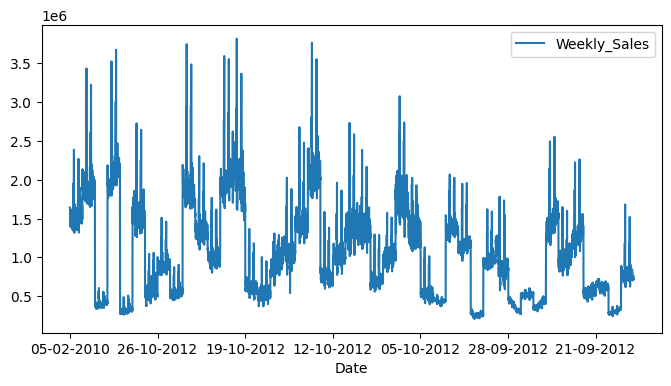

In [76]:
data.plot(figsize=(8,4))
plt.show()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
dtypes: float64(1)
memory usage: 100.5+ KB


In [78]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-4.624149498578306
p-value=0.00011655869699901148
n_lags,34
series is stationary


In [67]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

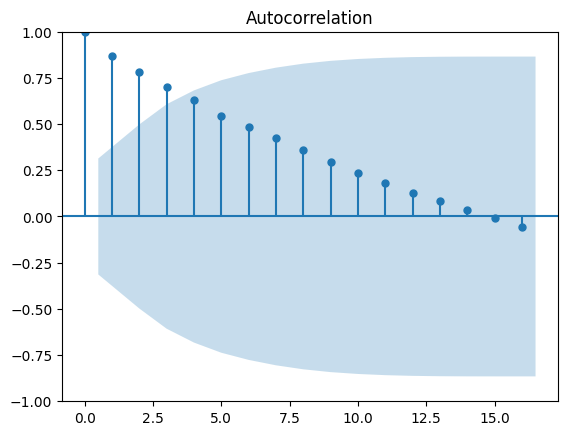

In [79]:
acf_plot=acf(data.dropna()) #Gradual decrease and previuous point to that - 1
plot_acf(acf_plot);


In [69]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

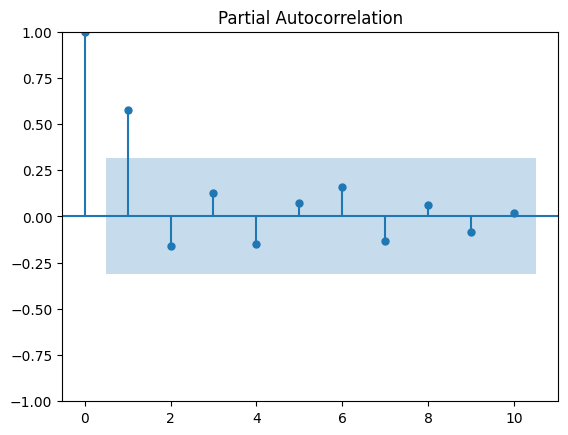

In [80]:
pacf_plot=pacf(data.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [84]:
train=new_data.iloc[:4500]['Weekly_Sales']
test=new_data.iloc[4500:]['Weekly_Sales']

In [85]:
from statsmodels.tsa.arima.model import ARIMA

In [86]:
model = ARIMA(train,order=(1,1,2)) #(p,d,q)
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

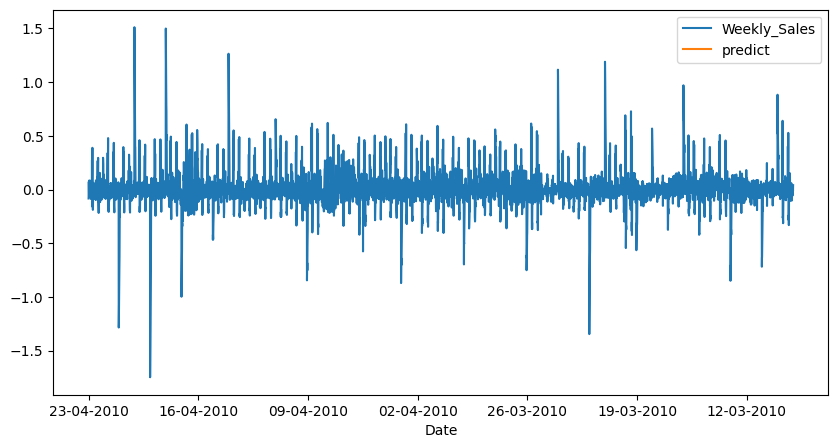

In [74]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['Weekly_Sales','predict']].plot(figsize=(10,5))